In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Implementación Proyecto Grado Maestría

Mounted at /content/drive
/content/drive/MyDrive/Implementación Proyecto Grado Maestría


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import pandas as pd
import os
import random

In [ ]:
dataPath = "all-mias"

In [ ]:
def jaccard_similarity(x,y):
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / (union.sum())
    return similarity

In [ ]:
def plotOrigImages(names, images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(22,22))
    axes = axes.flatten()
    for name, img, ax in zip(names, images_arr, axes):
        ax.imshow(img)
        ax.set_title(name[:6], fontsize=20)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
def plotImages(names, images):
    green_patch = mpatches.Patch(color='lime', label='Ground truth')
    red_patch = mpatches.Patch(color='red', label='Segmented')
    yellow_patch = mpatches.Patch(color='yellow', label='Intersection')
    fig, axes = plt.subplots(1, 4, figsize=(22,22))
    axes = axes.flatten()
    for name, img, ax in zip(names, images, axes):
        ax.legend(handles=[green_patch, red_patch, yellow_patch], prop={'size': 12}, loc='upper left')
        ax.imshow(img)
        ax.set_title(name, fontsize=20)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def jaccard_all(gt_masks_path, seg_masks_path, jaccard_df):
  gt_masks = glob.glob(gt_masks_path+'*.png')
  gt_masks = sorted(gt_masks) 
  seg_masks = glob.glob(seg_masks_path+'*.png')
  seg_masks = sorted(seg_masks) 
  overlaid_masks = []
  overlaid_names = []
  for gt_mask_path, seg_mask_path in zip(gt_masks, seg_masks):
      gt_mask = cv2.imread(gt_mask_path, 0)
      seg_mask = cv2.imread(seg_mask_path, 0)
      similarity = jaccard_similarity(gt_mask, seg_mask)
      #similarity = ("%.3f" %similarity)
      basename_gt = os.path.basename(gt_mask_path)  # e.g. MyPhoto.jpg
      name_gt = os.path.splitext(basename_gt)[0]  # e.g. MyPhoto 
      basename_seg = os.path.basename(seg_mask_path)  # e.g. MyPhoto.jpg
      name_seg = os.path.splitext(basename_seg)[0]  # e.g. MyPhoto 
      #df_new_row = {'GT_MASK': name_gt, 'SEG_MASK': name_seg, 'JACCARD_INDEX': similarity}
      #jaccard_df = jaccard_df.append(df_new_row, ignore_index = True)
      new_row = [name_gt[:6]+'_gt', name_seg[:6]+'_seg', float(similarity)]
      jaccard_df.loc[len(jaccard_df)] = new_row
      #overlaid = cv2.addWeighted(gt_mask,0.8,seg_mask,0.5,0)
      overlaid = np.dstack((seg_mask,gt_mask,np.zeros_like(gt_mask)))
      overlaid_masks.append(overlaid)
      overlaid_names.append('Overlaid masks '+name_gt[:6])
  name_img_list = list(zip(overlaid_names,overlaid_masks))
  #name_img_list = random.sample(name_img_list, 5)
  name_img_list = list(zip(*name_img_list))
  names, images = name_img_list
  plotImages(names, images)

imgs shape: (322, 1024, 1024, 3)


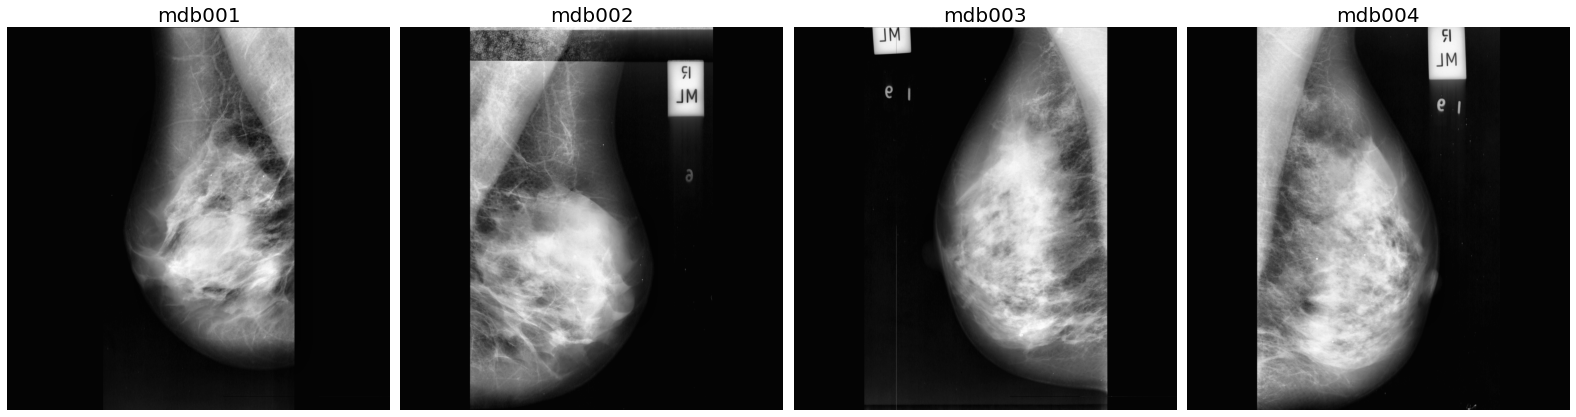

In [ ]:
imgs = []
names = []
files = glob.glob(dataPath+'/allmias_PNG_mat_eq/*.png')
files = sorted(files) 
for myFile in files:
    #print(myFile)
    image = cv2.imread (myFile)
    basename = os.path.basename(myFile)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto 
    imgs.append(image)
    names.append(name)

print('imgs shape:', np.array(imgs).shape)
plotOrigImages(names, imgs)

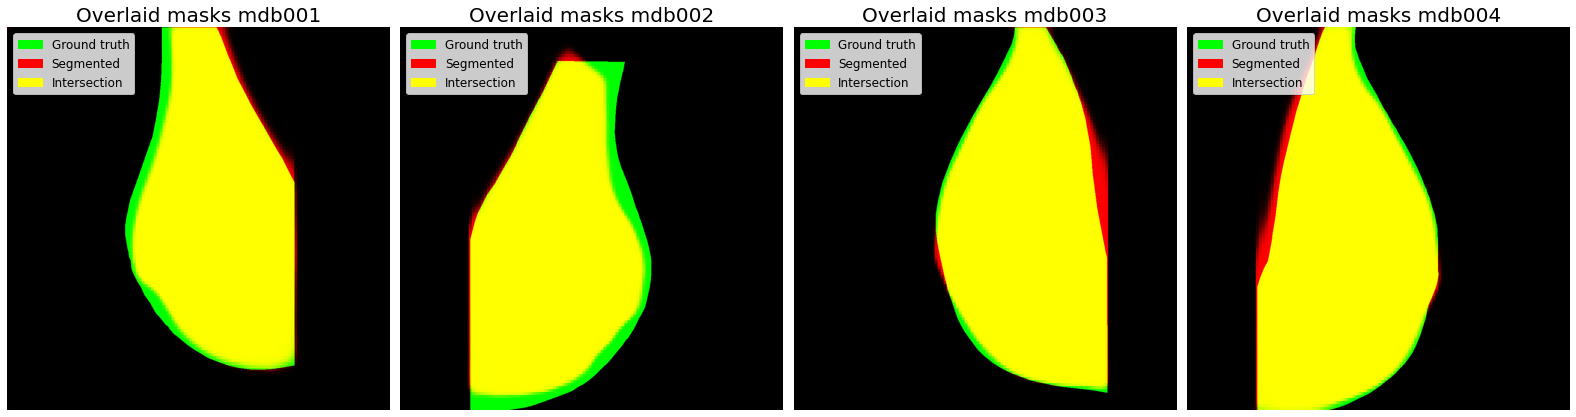

,GT_MASK,SEG_MASK,JACCARD_INDEX
0,mdb001_gt,mdb001_seg,0.882076
1,mdb002_gt,mdb002_seg,0.876215
2,mdb003_gt,mdb003_seg,0.893803
3,mdb004_gt,mdb004_seg,0.873481
4,mdb005_gt,mdb005_seg,0.913517
...,...,...,...
317,mdb318_gt,mdb318_seg,0.861828
318,mdb319_gt,mdb319_seg,0.915586
319,mdb320_gt,mdb320_seg,0.873898
320,mdb321_gt,mdb321_seg,0.927457


Average Jaccard similarity: 0.8748


In [ ]:
gt_masks_path = dataPath+'/roi_breast_polygons_masks/'
seg_masks_path = dataPath+'/roi_breast_h_eq_U_Net_masks(best)/'
jaccard_df = pd.DataFrame(columns=('GT_MASK', 'SEG_MASK', 'JACCARD_INDEX'))
jaccard_all(gt_masks_path, seg_masks_path, jaccard_df)
display(jaccard_df)
Total = (jaccard_df['JACCARD_INDEX'].sum()) / len(jaccard_df.index)
print('Average Jaccard similarity:', "%.4f" %Total)  

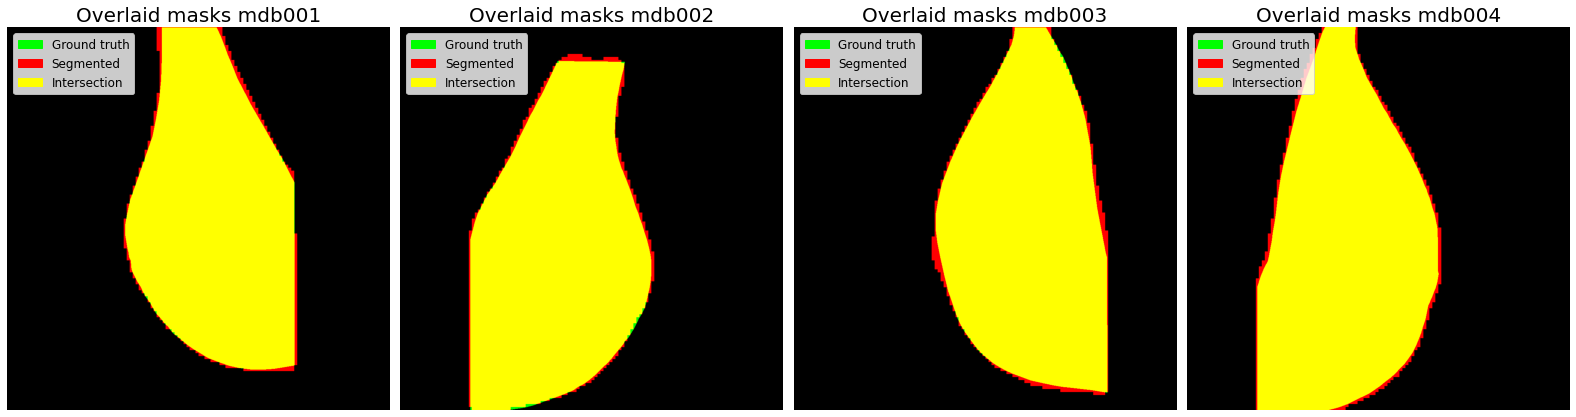

,GT_MASK,SEG_MASK,JACCARD_INDEX
0,mdb001_gt,mdb001_seg,0.961804
1,mdb002_gt,mdb002_seg,0.962702
2,mdb003_gt,mdb003_seg,0.960331
3,mdb004_gt,mdb004_seg,0.956987
4,mdb005_gt,mdb005_seg,0.971610
...,...,...,...
317,mdb318_gt,mdb318_seg,0.890565
318,mdb319_gt,mdb319_seg,0.969557
319,mdb320_gt,mdb320_seg,0.933151
320,mdb321_gt,mdb321_seg,0.956306


Average Jaccard similarity: 0.9563


In [ ]:
gt_masks_path = dataPath+'/roi_breast_polygons_masks/'
seg_masks_path = dataPath+'/roi_breast_eq_U_Net_msks_bin/'
jaccard_df = pd.DataFrame(columns=('GT_MASK', 'SEG_MASK', 'JACCARD_INDEX'))
jaccard_all(gt_masks_path, seg_masks_path, jaccard_df)
display(jaccard_df)
Total = (jaccard_df['JACCARD_INDEX'].sum()) / len(jaccard_df.index)
print('Average Jaccard similarity:', "%.4f" %Total) 

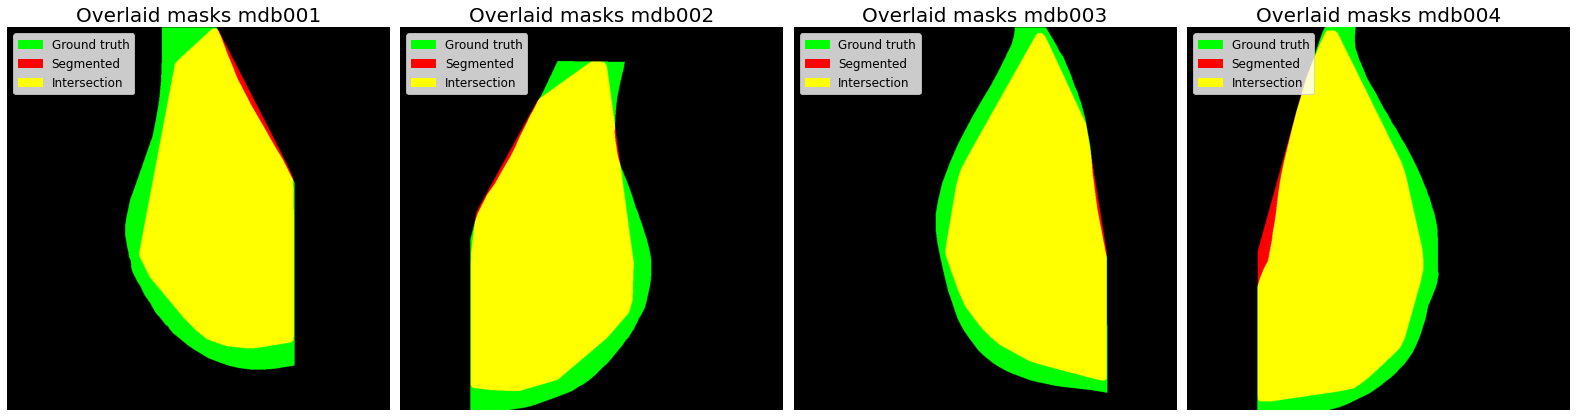

,GT_MASK,SEG_MASK,JACCARD_INDEX
0,mdb001_gt,mdb001_seg,0.809757
1,mdb002_gt,mdb002_seg,0.848248
2,mdb003_gt,mdb003_seg,0.828774
3,mdb004_gt,mdb004_seg,0.843418
4,mdb005_gt,mdb005_seg,0.725185
...,...,...,...
317,mdb318_gt,mdb318_seg,0.839511
318,mdb319_gt,mdb319_seg,0.860757
319,mdb320_gt,mdb320_seg,0.861102
320,mdb321_gt,mdb321_seg,0.691740


Average Jaccard similarity: 0.7870


In [ ]:
gt_masks_path = dataPath+'/roi_breast_polygons_masks/'
seg_masks_path = dataPath+'/00_masks_allmias_mat_proc_eq_prev/'
jaccard_df = pd.DataFrame(columns=('GT_MASK', 'SEG_MASK', 'JACCARD_INDEX'))
jaccard_all(gt_masks_path, seg_masks_path, jaccard_df)
display(jaccard_df)
Total = (jaccard_df['JACCARD_INDEX'].sum()) / len(jaccard_df.index)
print('Average Jaccard similarity:', "%.4f" %Total)  

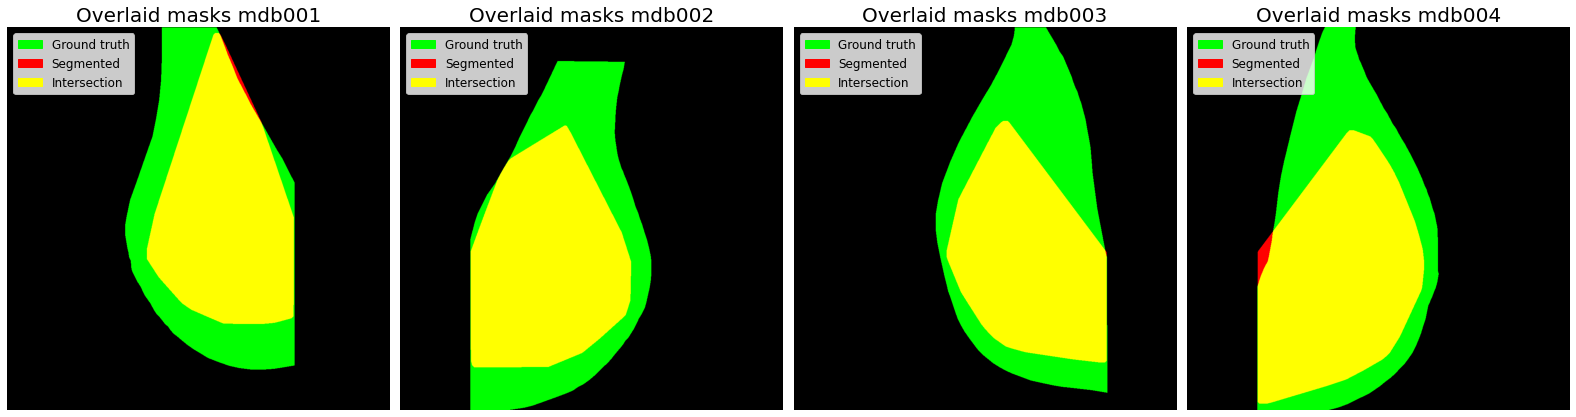

,GT_MASK,SEG_MASK,JACCARD_INDEX
0,mdb001_gt,mdb001_seg,0.647013
1,mdb002_gt,mdb002_seg,0.629524
2,mdb003_gt,mdb003_seg,0.569048
3,mdb004_gt,mdb004_seg,0.643100
4,mdb005_gt,mdb005_seg,0.736155
...,...,...,...
317,mdb318_gt,mdb318_seg,0.832201
318,mdb319_gt,mdb319_seg,0.737878
319,mdb320_gt,mdb320_seg,0.778285
320,mdb321_gt,mdb321_seg,0.728492


Average Jaccard similarity: 0.7224


In [ ]:
gt_masks_path = dataPath+'/roi_breast_polygons_masks/'
seg_masks_path = dataPath+'/01_masks_allmias_mat_proc_eq/'
jaccard_df = pd.DataFrame(columns=('GT_MASK', 'SEG_MASK', 'JACCARD_INDEX'))
jaccard_all(gt_masks_path, seg_masks_path, jaccard_df)
display(jaccard_df)
Total = (jaccard_df['JACCARD_INDEX'].sum()) / len(jaccard_df.index)
print('Average Jaccard similarity:', "%.4f" %Total)  

In [ ]:
if os.path.isdir(dataPath+'/segmented_1/') is False:

  os.makedirs(dataPath+'/segmented_1/')
  segmented_breast_U_Net = dataPath+'/segmented_1/'

  images_path = dataPath+'/allmias_PNG_mat_eq/'
  masks_path = dataPath+'/roi_breast_h_eq_U_Net_masks/'

  images = glob.glob(images_path+'*.png')
  images = sorted(images) 
  masks = glob.glob(masks_path+'*.png')
  masks = sorted(masks) 
  names = []
  for image, mask in zip(images, masks):
      basename = os.path.basename(image)  # e.g. MyPhoto.jpg
      name = os.path.splitext(basename)[0]  # e.g. MyPhoto 
      image = cv2.imread(image,0)
      mask = cv2.imread(mask,0)
      #print(image.shape)
      #print(mask.shape)
      masked_image = cv2.bitwise_and(image,mask)
      cv2.imwrite(segmented_breast_U_Net + name + '.png', masked_image, [int(cv2.IMWRITE_PNG_COMPRESSION),0])

In [ ]:
if os.path.isdir(dataPath+'/seg_breast_eq_U_Net_msks_bin/') is False:

  os.makedirs(dataPath+'/seg_breast_eq_U_Net_msks_bin/')
  segmented_breast_U_Net = dataPath+'/seg_breast_eq_U_Net_msks_bin/'

  images_path = dataPath+'/allmias_PNG_mat_eq/'
  masks_path = dataPath+'/roi_breast_eq_U_Net_msks_bin/'

  images = glob.glob(images_path+'*.png')
  images = sorted(images) 
  masks = glob.glob(masks_path+'*.png')
  masks = sorted(masks) 
  names = []
  for image, mask in zip(images, masks):
      basename = os.path.basename(image)  # e.g. MyPhoto.jpg
      name = os.path.splitext(basename)[0]  # e.g. MyPhoto 
      image = cv2.imread(image,0)
      mask = cv2.imread(mask,0)
      #print(image.shape)
      #print(mask.shape)
      masked_image = cv2.bitwise_and(image,mask)
      cv2.imwrite(segmented_breast_U_Net + name + '.png', masked_image, [int(cv2.IMWRITE_PNG_COMPRESSION),0])

In [ ]:
if os.path.isdir(dataPath+'/segmented_2/') is False:

  os.makedirs(dataPath+'/segmented_2/')
  segmented_1_path = dataPath+'/segmented_2/'

  images_path = dataPath+'/allmias_PNG_mat_eq/'
  masks_path = dataPath+'/00_masks_allmias_mat_proc_eq_prev/'

  images = glob.glob(images_path+'*.png')
  images = sorted(images) 
  masks = glob.glob(masks_path+'*.png')
  masks = sorted(masks) 
  names = []
  for image, mask in zip(images, masks):
      basename = os.path.basename(image)  # e.g. MyPhoto.jpg
      name = os.path.splitext(basename)[0]  # e.g. MyPhoto 
      image = cv2.imread(image,0)
      mask = cv2.imread(mask,0)
      #print(image.shape)
      #print(mask.shape)
      masked_image = cv2.bitwise_and(image,mask)
      cv2.imwrite(segmented_1_path + name + '.png', masked_image, [int(cv2.IMWRITE_PNG_COMPRESSION),0])

In [ ]:
if os.path.isdir(dataPath+'/segmented_3/') is False:

  os.makedirs(dataPath+'/segmented_3/')
  segmented_1_path = dataPath+'/segmented_3/'

  images_path = dataPath+'/allmias_PNG_mat_eq/'
  masks_path = dataPath+'/01_masks_allmias_mat_proc_eq/'

  images = glob.glob(images_path+'*.png')
  images = sorted(images) 
  masks = glob.glob(masks_path+'*.png')
  masks = sorted(masks) 
  names = []
  for image, mask in zip(images, masks):
      basename = os.path.basename(image)  # e.g. MyPhoto.jpg
      name = os.path.splitext(basename)[0]  # e.g. MyPhoto 
      image = cv2.imread(image,0)
      mask = cv2.imread(mask,0)
      #print(image.shape)
      #print(mask.shape)
      masked_image = cv2.bitwise_and(image,mask)
      cv2.imwrite(segmented_1_path + name + '.png', masked_image, [int(cv2.IMWRITE_PNG_COMPRESSION),0])

In [ ]:
!python --version 

Python 3.8.15


In [ ]:
cv2.__version__

'4.6.0'

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f0ab4209-c58c-e691-3064-affc87805a7f)
